<a href="https://colab.research.google.com/github/DhushyanthRavichandran/AI/blob/main/datatree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/nunnarilabs/ml/master/car_data/car.data',names=['buying','maint','doors','persons','lug_boot','safety','class'])

In [ ]:
df


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
df[df['doors']=='4']

,buying,maint,doors,persons,lug_boot,safety,class
54,vhigh,vhigh,4,2,small,low,unacc
55,vhigh,vhigh,4,2,small,med,unacc
56,vhigh,vhigh,4,2,small,high,unacc
57,vhigh,vhigh,4,2,med,low,unacc
58,vhigh,vhigh,4,2,med,med,unacc
...,...,...,...,...,...,...,...
1696,low,low,4,more,med,med,good
1697,low,low,4,more,med,high,vgood
1698,low,low,4,more,big,low,unacc
1699,low,low,4,more,big,med,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
df['class'],class_names=pd.factorize(df['class'])
class_names

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')

In [ ]:
data_backup=df.copy()
data_backup.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [ ]:
df['buying'],_=pd.factorize(df['buying'])
df['maint'],_=pd.factorize(df['maint'])
df['lug_boot'],_=pd.factorize(df['lug_boot'])
df['safety'],_=pd.factorize(df['safety'])
df['persons'],_=pd.factorize(df['persons'])
df['doors'],_=pd.factorize(df['doors'])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1723,3,3,3,2,1,1,3
1724,3,3,3,2,1,2,2
1725,3,3,3,2,2,0,0
1726,3,3,3,2,2,1,3


factorize->label encoding ,getdummies(a,b,c)if yes then 1->onehot encoding(a,b id=f a or b if not and b then it will be c)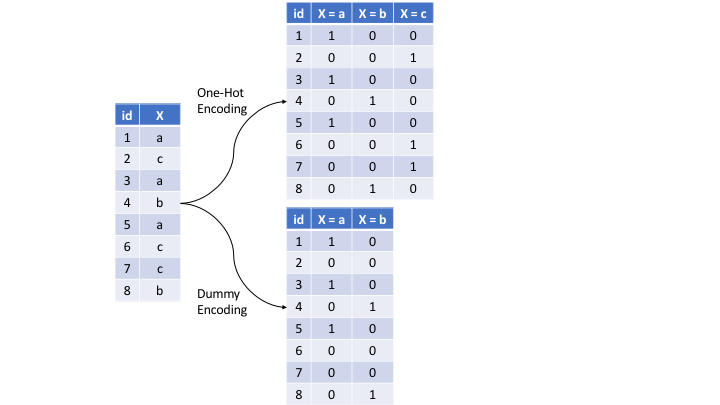

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
x

,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
1723,3,3,3,2,1,1
1724,3,3,3,2,1,2
1725,3,3,3,2,2,0
1726,3,3,3,2,2,1


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn import tree,metrics

In [ ]:
dtree=tree.DecisionTreeClassifier(criterion='gini')
dtree.fit(x_test,y_test)

DecisionTreeClassifier()

In [ ]:
y_train_pred=dtree.predict(x_train)
accuracy=metrics.accuracy_score(y_train,y_train_pred)
print("train accuracy: {:.2f}".format(accuracy))

train accuracy: 0.96
